# Comparison of Heart Disease Classifiers

## Authors: Rayhaan Rasheed, Solomon Mekonnen, Sam Aboagye

### Data: 
The data used in this project is the Heart Disease Dataset generated by Robert Detrano, M.D., Ph.D. at the V.A. Medical Center, Long Beach and Cleveland Clinic Foundation. The full database was pulled from the Machine Learning Repository created by the University of California Irvine.

There are 76 attributes in total, but the literature prefers using only 14 of them:
1.  Age
2.  Sex
3.  Chest Pain Rating
4.  Resting Blood Pressure
5.  Serum Cholestoral in mg/dl
6.  Blood Sugar Level While Fasting 
7.  Resting EKG
8.  Maximum Heart Rate Achieved
9.  Exercise Induced Angina
10. ST Depression Induced by Exercise Relative to Rest
11. Slope of the Peak Exercise ST Segment 
12. Number of Major Vessels Colored by Flourosopy 
13. HR Type (Normal, Fixed Defect, or Reversible Defect)
14. Class(target) 

### Overview:
This project aims to evaluate and compare different classifers using the Heart Disease database. Instead on turning this into a multi-class classification problem, the target values will be changed to either 0 or 1. Any target value that has a value greater or equal to 1 will be a 1 in the new target column; likewise, anything with a 0 will stay 0. The reason for this is to focus on the fundamental issue of whether a patient qualifies for having any sign or heart disease (OnevsAll) 

The classifier used:
* Logistic Regression
* Random Forest
* Support Vector Machine

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

feature_Descriptions = {"age": "Age", "sex": "", "cp": "Chest Pain Rating", "trestbps": "Resting Blood Pressure",
            "chol":"Serum Cholestoral in mg/dl", "fbs":"Blood Sugar Level While Fasting", "restecg":"Resting EKG", "thalach":"Maximum Heart Rate Achieved",
            "exang":"Exercise Induced Angina","oldpeak":"ST Depression Induced by Exercise Relative to Rest", "slope":"Slope of the Peak Exercise ST Segment",
            "ca":"Number of Major Vessels Colored by Flourosopy", "thal":"HR Type(Normal, Fixed Defect, or Reversible Defect)","target":"Target"}

#Get list of features code
features =[]
for feature in feature_Descriptions:
    features.append(feature)
     
df = pd.read_csv(url, header = None, names=features)

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Preprocessing and Data Analysis:
* EDA
* Encode the ordinal data
* Separate features and target
* Split into test and train 
* Build simple logistic regression as our base

In [3]:
import numpy as np

print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))

# Replace ? with np.NaN
df = df.replace('?',np.NaN)

# Remove rows with np.NaN
df = df.dropna()

print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))

Number of rows before removing rows with missing values: 303
Number of rows after removing rows with missing values: 297


In [4]:
cont_features = ['oldpeak','sex','chol','thalach']
df_0 = df[df.target == 0]
df_1 = df[df.target == 1]
df_2 = df[df.target == 2]
df_3 = df[df.target == 3]
df_4 = df[df.target == 4]

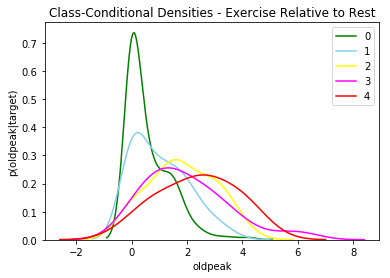

In [5]:
sns.distplot( df_0["oldpeak"] , color="green", label="0", hist=False)
sns.distplot( df_1["oldpeak"] , color="skyblue", label="1",hist=False)
sns.distplot( df_2["oldpeak"] , color="yellow", label="2",hist=False)
sns.distplot( df_3["oldpeak"] , color="magenta", label="3",hist=False)
sns.distplot( df_4["oldpeak"] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Exercise Relative to Rest")
plt.ylabel("p(oldpeak|target)")
plt.show()

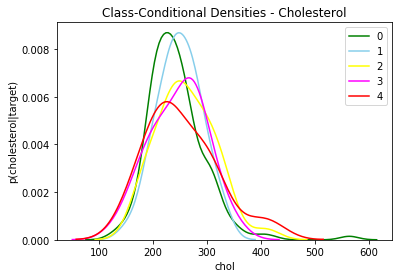

In [6]:
sns.distplot( df_0['chol'] , color="green", label="0", hist=False)
sns.distplot( df_1['chol'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['chol'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['chol'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['chol'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Cholesterol")
plt.ylabel("p(cholesterol|target)")
plt.show()

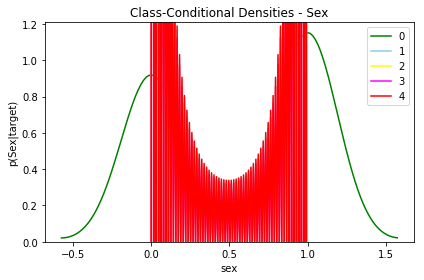

In [7]:
sns.distplot( df_0['sex'] , color="green", label="0", hist=False)
sns.distplot( df_1['sex'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['sex'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['sex'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['sex'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Sex")
plt.ylabel("p(Sex|target)")
plt.tight_layout()
plt.show()

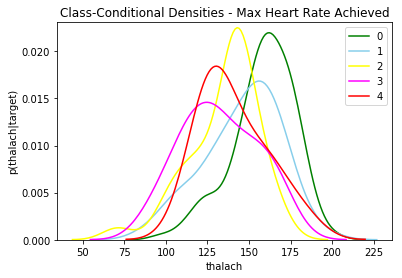

In [8]:
sns.distplot( df_0['thalach'] , color="green", label="0", hist=False)
sns.distplot( df_1['thalach'] , color="skyblue", label="1",hist=False)
sns.distplot( df_2['thalach'] , color="yellow", label="2",hist=False)
sns.distplot( df_3['thalach'] , color="magenta", label="3",hist=False)
sns.distplot( df_4['thalach'] , color="red", label="4",hist=False)
plt.legend()
plt.title("Class-Conditional Densities - Max Heart Rate Achieved")
plt.ylabel("p(thalach|target)")
plt.show()

#### Relabel Classes
* We want to turn the cassifier into a dichotomizer (binary) 
* OvA probelem focusing on class 0 in target

In [9]:
target = []
for i in df['target']:
    if i == 0:
        target.append(0)
    else:
        target.append(1)

y = pd.Series(target)       

# Specify the name of the features
features = list(df.drop('target', axis=1).columns)

# Get the feature vector
X = df[features]


Value 0: less sign of Heart disease

Value 1: high sign of Heart disease 

#### Split Data & Standardize

In [10]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (set randome_state as 0 and stratify as y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)


In [11]:
from sklearn.preprocessing import StandardScaler

# Declare the StandardScaler
std_scaler = StandardScaler()

# Standardize the features in the training data
X_train_main = std_scaler.fit_transform(X_train)

# Standardize the features in testing data

X_test_main = std_scaler.transform(X_test)


<break>

## Identify and Select Most Important Features using Random Forest Classifier

<break>

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Delcare the model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
# Train the model
rf.fit(X_train_main,y_train)
# Print the classification accuracy
print('The accuracy of random forest is: ' + str(rf.score(X_test_main, y_test)))

The accuracy of random forest is: 0.777777777778


In [13]:
for feature in zip(features, rf.feature_importances_):
    print(feature)

('age', 0.12456042133660516)
('sex', 0.020527428759443942)
('cp', 0.11192224178557661)
('trestbps', 0.070919650213733851)
('chol', 0.074705407896707515)
('fbs', 0.012444964504560677)
('restecg', 0.017908622200429953)
('thalach', 0.11316231665876497)
('exang', 0.059410647578514886)
('oldpeak', 0.085374050663776319)
('slope', 0.067813530736439295)
('ca', 0.067724680429320477)
('thal', 0.17352603723612633)


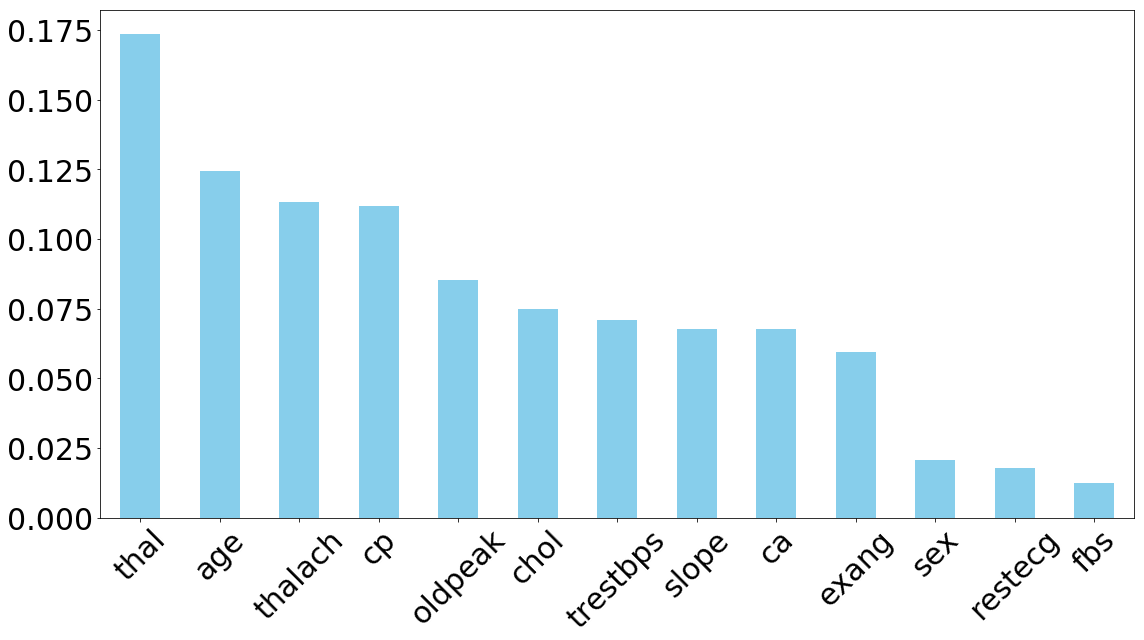

In [14]:
# Convert the importances into one-dimensional 1d array with corresponding df column names as axis labels
f_importances = f_importances = pd.Series(rf.feature_importances_, features)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=30,color='skyblue')

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.1
sfm = SelectFromModel(rf, threshold=0.1)
important_features =[]  
# Train the selector
sfm.fit(X_train, y_train)
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    important_features.append(features[feature_list_index])
    print(features[feature_list_index] + '|' + feature_Descriptions[features[feature_list_index]])

age|Age
cp|Chest Pain Rating
thalach|Maximum Heart Rate Achieved
thal|HR Type(Normal, Fixed Defect, or Reversible Defect)


##### Top 4 Features
* Thal: HR Type(Normal, Fixed Defect, or Reversible Defect)
* Age: Age of subject
* Thalach: Maximum heart rate achieved
* Cp: Chest Pain Type

In [16]:
# Transform the data to create a new dataset containing only the most important features

# Apply the transform to both the training X and test X data.
X_train_important = std_scaler.fit_transform( X_train[important_features])
X_test_important = std_scaler.transform(X_test[important_features])



## Hypterparameter tuning and model selection using pipeline and GridSearchCV

- Logistic regression
- Random forest
- Support vector machine

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clfs = {'lr': LogisticRegression(random_state=0),
        'rf': RandomForestClassifier(random_state=0),
        'svc': SVC(random_state=0)}

pipe_clfs = {}

for name, clf in clfs.items():
    pipe_clfs[name] = Pipeline([('StandardScaler', StandardScaler()), ('clf', clf)])

#Create the dictionary of parameter grids
param_grids = {}

#Logistic Regression
C_range = [10 ** i for i in range(-4, 5)]

param_grid = [{'clf__multi_class': ['multinomial'],
               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'clf__C': C_range}]

param_grids['lr'] = param_grid

#Random Forest
param_grid = [{'clf__n_estimators': [2, 10, 30],
               'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}]

param_grids['rf'] = param_grid

# Support Vector Machine
param_grid = [{'clf__C': [0.01, 0.1, 1, 10],
               'clf__gamma': [0.01, 0.1, 1, 10, 100],
               'clf__kernel': ['linear', 'rbf', 'sigmoid']}]

param_grids['svc'] = param_grid


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# The list of [best_score_, best_params_, best_estimator_]
best_score_param_estimators = []

# For each classifier
for name in pipe_clfs.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipe_clfs[name],
                      param_grid=param_grids[name],
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0))
    # Fit the pipeline
    gs = gs.fit(X_train_important, y_train)
    
    # Update best_score_param_estimators
    best_score_param_estimators.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

In [19]:
# Sort best_score_param_estimators in descending order of the best_score_
best_score_param_estimators = sorted(best_score_param_estimators, key=lambda x : x[0], reverse=True)


for best_score_param_estimator in best_score_param_estimators: 
    # Print out [best_score_, best_params_, best_estimator_], where best_estimator_ is a pipeline
    print([best_score_param_estimator[0], best_score_param_estimator[1], type(best_score_param_estimator[2].named_steps['clf'])], end='\n\n')

[0.80193236714975846, {'clf__C': 0.01, 'clf__multi_class': 'multinomial', 'clf__solver': 'newton-cg'}, <class 'sklearn.linear_model.logistic.LogisticRegression'>]

[0.80193236714975846, {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'sigmoid'}, <class 'sklearn.svm.classes.SVC'>]

[0.79710144927536231, {'clf__min_samples_leaf': 30, 'clf__min_samples_split': 2, 'clf__n_estimators': 10}, <class 'sklearn.ensemble.forest.RandomForestClassifier'>]



<break>

## Model Evaluation
* Confusion Matrix
* Precision Score
* F1-score
* ROC Curve w/ AUC

In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [21]:
### CONFUSION MATRIX PLOT FUNCTION ###
def conf_plot(confmat):
    fig, ax = plt.subplots(figsize=(2.5,2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

In [22]:
## RECIEVER OPERATING CURVE ##
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_auc(name, y_pred, color, plot=False):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    if plot == True:
        plt.figure()
        plt.plot(fpr, tpr, color=color, marker ='.', label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], color='black', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic: '+str(name))
        plt.legend(loc="lower right")
        plt.show()

### Logistic Regression

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False))])

The accuracy of the logistic classifier is: 0.788888888889


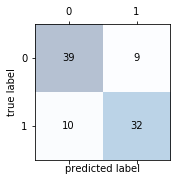

F1: 0.771


In [23]:
# Logistic Regression
print(best_score_param_estimators[0][2])
print()
# Print the accuracy
print('The accuracy of the logistic classifier is: ' + str(best_score_param_estimators[0][2].score(X_test_important, y_test)))
y_pred_lrcv = best_score_param_estimators[0][2].predict(X_test_important)
confmat_lrcv = confusion_matrix(y_true = y_test, y_pred=y_pred_lrcv)
conf_plot(confmat_lrcv)
print('F1: %.3f' % f1_score(y_true=y_test,y_pred=y_pred_lrcv))

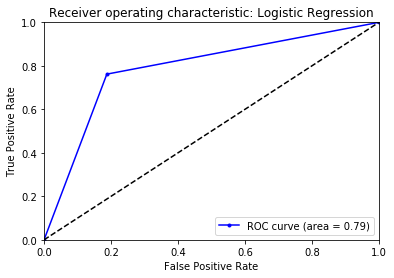

In [24]:
plot_roc_auc('Logistic Regression', y_pred_lrcv, color='blue', plot = True)

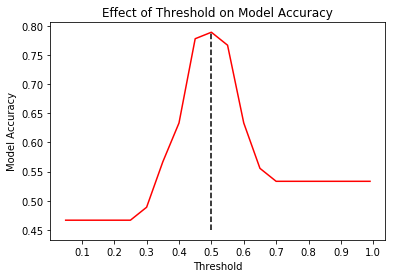

In [25]:
pred_proba_df = pd.DataFrame(best_score_param_estimators[0][2].predict_proba(X_test_important))
y_pred_lrcv = pd.DataFrame(y_pred_lrcv)
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
val = []
for i in threshold_list:
    y_pred_lrcv = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                    y_pred_lrcv.iloc[:,1].as_matrix().reshape(y_pred_lrcv.iloc[:,1].as_matrix().size,1))
    val.append(test_accuracy)

plt.plot(threshold_list, val, color = "red")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("Effect of Threshold on Model Accuracy")
plt.ylabel("Model Accuracy")
plt.xlabel("Threshold")
plt.plot([0.5,0.5],[.45,max(val)], color = "black", linestyle='--')
plt.show()   

### Support Vector Machine

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False))])



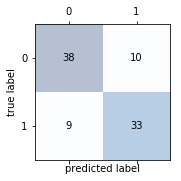

F1: 0.776


In [26]:
print(best_score_param_estimators[1][2])
print()
y_predict_svm = best_score_param_estimators[1][2].predict(X_test_important)
confmat_svm = confusion_matrix(y_true = y_test, y_pred=y_predict_svm)
conf_plot(confmat_svm)
print('F1: %.3f' % f1_score(y_true=y_test,y_pred=y_predict_svm))

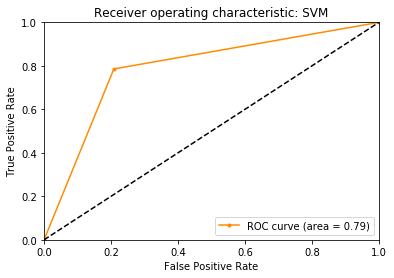

In [27]:
plot_roc_auc('SVM',y_predict_svm,'darkorange', plot=True)

### Random Forest
 

Pipeline(memory=None,
     steps=[('StandardScaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=Non...estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])



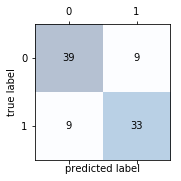

F1: 0.786


In [28]:
print(best_score_param_estimators[2][2])
print()

# Train the new classifier on the new dataset containing the most important features
y_predict_rf = best_score_param_estimators[2][2].predict(X_test_important)
confmat_rf = confusion_matrix(y_true = y_test, y_pred=y_predict_rf)
conf_plot(confmat_rf)
print('F1: %.3f' % f1_score(y_true=y_test,y_pred=y_predict_rf))

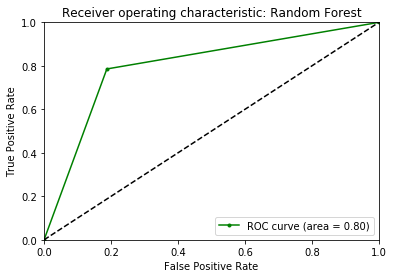

In [29]:
plot_roc_auc('Random Forest', y_predict_rf, color='green', plot=True)

<break>